In [314]:
import tensorflow as tf
from tensorflow.python.client import device_lib
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import sklearn
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.metrics import r2_score
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import mean_squared_error, r2_score


ERROR! Session/line number was not unique in database. History logging moved to new session 183


In [232]:
print("Num GPUs avaliable: ", len(tf.config.experimental.list_physical_devices('GPU')))
print("Keras Version " + keras.__version__)
print("TF Version " + tf.__version__)
print("Numpy Version " + np.__version__)
print("Pandas Version " + pd.__version__)
print("Matplotlib Version " + matplotlib.__version__)
print("Seaborn Version " + sns.__version__)
print("Scikit Version " + sklearn.__version__)

'''
Num GPUs avaliable:  1
Keras Version 2.3.1
TF Version 2.1.0
Numpy Version 1.19.2
Pandas Version 1.1.3
Matplotlib Version 3.2.2
Seaborn Version 0.11.0
Scikit Version 0.23.2
'''

Num GPUs avaliable:  1
Keras Version 2.3.1
TF Version 2.1.0
Numpy Version 1.19.2
Pandas Version 1.1.3
Matplotlib Version 3.2.2
Seaborn Version 0.11.0
Scikit Version 0.23.2


'\nNum GPUs avaliable:  1\nKeras Version 2.3.1\nTF Version 2.1.0\nNumpy Version 1.19.2\nPandas Version 1.1.3\nMatplotlib Version 3.2.2\nSeaborn Version 0.11.0\nScikit Version 0.23.2\n'

In [233]:
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3928278293661135637
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3138361755
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11536568247840814691
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1050 Ti with Max-Q Design, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [389]:
#Importing the Dataset
dataset = pd.read_csv('2021_10_31_cleaned_lake_dataset_with_tds.csv', header=0, index_col=0)
dataset = dataset.rename(columns={'actual_conductivity':'cond', 'total_dissolved_solids':'tds', 'do_concentration':'do', 'turbidity':'turb', 'chl-a_concentration':'chl-a', 'temperature':'temp'})
dataset = dataset[['temp', 'cond', 'do', 'tds', 'turb', 'chl-a']]
dataset.sort_index()
dataset.head()

,temp,cond,do,tds,turb,chl-a
datetime,,,,,,
2019-02-20 12:00:00,29.55674,92.12651,6.491213,0.055088,32.86783,39.64875
2019-02-20 12:10:00,29.59175,92.22813,6.724226,0.055115,24.30492,40.57396
2019-02-20 12:20:00,29.57693,91.93182,6.677357,0.054952,47.46174,40.88269
2019-02-20 12:30:00,29.63118,92.45161,7.540924,0.055210,55.04100,46.67803
2019-02-20 12:40:00,29.64378,92.78736,7.629431,0.055398,26.58170,47.05107


In [226]:
#Data Preprocessing

#Trying on both trimmed and untrimmed
# trimmed_dataset = dataset[:] #['2019-02-20' : '2019-04-05'] #
# trimmed_dataset.tail()
# print("Trimmed dataset shape: " + str(trimmed_dataset.shape))

# #Ascertain all data is float
# values = trimmed_dataset.values

# values = values.astype('float32')

# #Normalizing Features
# scaler = MinMaxScaler(feature_range=(0,1))
# scaled_data = scaler.fit_transform(values)
# # scaled_df = pd.DataFrame(scaled_data)
# # scaled_df.tail()
# print("Scaled dataset shape: " + str(values.shape))

In [390]:
#Data Random Split #TYPE2
dataset_trimmed = dataset['2019-02-20' : '2019-09-12'] #['2019-02-20' : '2019-03-21']#['2019-03-05' : '2019-09-12']

#removing params don't help


train_dataset_rand = dataset_trimmed.sample(frac=0.8) #80% split
test_dataset_rand = dataset_trimmed.drop(train_dataset_rand.index)
train_labels_rand = train_dataset_rand.pop('chl-a')
test_labels_rand = test_dataset_rand.pop('chl-a')


dataset_trimmed.tail()

,temp,cond,do,tds,turb,chl-a
datetime,,,,,,
2019-04-05 09:00:17,28.91959,76.91243,3.080355,0.046511,63.40566,49.60603
2019-04-05 09:10:17,28.94431,76.73137,3.062878,0.046381,72.05052,47.30184
2019-04-05 09:20:17,28.93608,76.69234,2.589782,0.046364,63.05659,44.22813
2019-04-05 09:30:17,28.94136,76.72667,2.999108,0.046381,80.66748,45.35073
2019-04-05 09:40:17,28.96102,76.72181,3.165897,0.046362,68.04305,44.16881


In [391]:
print(train_dataset_rand.shape)
train_dataset_rand.head()

(4970, 5)


,temp,cond,do,tds,turb
datetime,,,,,
2019-03-16 18:03:33,30.40947,93.40318,8.945712,0.055027,151.41540
2019-03-07 11:28:05,30.73688,102.04390,7.329248,0.059778,15.14248
2019-02-22 07:30:00,29.90705,95.38881,10.074120,0.056690,44.02038
2019-03-09 14:38:05,30.47960,105.71560,4.484990,0.062205,18.15875
2019-03-21 07:44:44,30.97436,98.02127,5.942934,0.057188,93.74286


In [392]:
print(test_dataset_rand.shape)
test_dataset_rand.tail()

(1242, 5)


,temp,cond,do,tds,turb
datetime,,,,,
2019-04-05 05:20:17,29.09438,76.98512,3.854485,0.046411,71.78382
2019-04-05 06:30:17,29.03807,76.86220,3.461410,0.046383,65.08958
2019-04-05 06:50:17,29.00289,77.02348,3.442369,0.046509,70.94141
2019-04-05 07:40:17,28.94562,76.62620,2.918184,0.046317,65.67556
2019-04-05 08:00:17,28.92626,76.69125,2.579333,0.046372,81.01317


In [393]:
#Dataset Stats
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
temp,8516.0,30.033648,0.613371,28.474770,29.622605,30.116715,30.463680,31.595630
cond,8516.0,99.561995,8.891243,71.087590,94.474533,98.563085,105.827075,125.575600
do,8516.0,6.139510,2.277367,0.115000,4.388463,6.196976,7.700019,13.116540
tds,8516.0,0.059048,0.005393,0.042957,0.055888,0.058087,0.062871,0.075244
turb,8516.0,82.244682,54.427438,9.632318,42.198635,66.794560,106.602300,272.187000
chl-a,8516.0,276.399605,264.205888,24.960230,60.750943,205.356200,347.067525,1126.180000


In [394]:
#Normalize random data
train_rand_val = train_dataset_rand.values
test_rand_val = test_dataset_rand.values
scaler = MinMaxScaler(feature_range=(-1,1))

scaled_train_rand = scaler.fit_transform(train_rand_val)
scaled_test_rand = scaler.fit_transform(test_rand_val)

print(scaled_train_rand.shape)
print(scaled_test_rand.shape)
print(len(train_dataset_rand.keys()))

(4970, 5)
(1242, 5)
5


In [395]:
print(scaled_train_rand)
print(scaled_test_rand)

[[ 0.23985055  0.09591306  0.41689027  0.04381065  0.07746534]
 [ 0.44967092  0.52025667  0.15752815  0.45474617 -0.96347882]
 [-0.0821248   0.19342686  0.59794366  0.18761781 -0.74289001]
 ...
 [ 0.17352268  0.47232064  0.11475017  0.44356141 -0.60765885]
 [ 0.01629038  0.14408482 -0.10361497  0.12300339 -0.80615426]
 [ 0.29955205  0.11998912  0.2490084   0.0610855   0.78245367]]
[[-0.24122017 -0.06848067  0.25707563 -0.06803814 -0.66960137]
 [-0.23543161 -0.10538708  0.35767528 -0.10721409 -0.79465745]
 [-0.23968849 -0.09983176  0.36183618 -0.1009281  -0.83819487]
 ...
 [-0.66698825 -0.73599937 -0.49955022 -0.72258051 -0.53182402]
 [-0.70496206 -0.75422412 -0.58828076 -0.7380413  -0.57203575]
 [-0.71779902 -0.75124003 -0.6456392  -0.73360904 -0.45491281]]


In [398]:
# Create model
#, kernel_regularizer=tf.keras.regularizers.l1(0.01), activity_regularizer=tf.keras.regularizers.l2(0.01)
model = Sequential()
model.add(Dense(32, kernel_initializer= 'normal', input_dim=len(train_dataset_rand.keys()), activation="tanh", kernel_regularizer=l2(0.0001))) #0.001 poor performance
#model.add(Dropout(0.2)) 
model.add(Dense(64, kernel_initializer= 'normal', activation="sigmoid", kernel_regularizer=l2(0.0001))) #0.001 poor performance
#model.add(Dropout(0.2))
model.add(Dense(8, kernel_initializer= 'normal', activation="tanh", kernel_regularizer=l2(0.0001))) #0.001 poor performance
#model.add(Dropout(0.2))

# Since the regression is performed, a Dense layer containing a single neuron with a linear activation function.
# Typically ReLu-based activation are used but since it is performed regression, it is needed a linear activation.
model.add(Dense(1, activation="linear"))

# Compile model: The model is initialized with the Adam optimizer and then it is compiled.
model.compile(loss='mae', optimizer= 'adam', metrics=['mae', 'mse']) #Adam(lr=1e-3, decay=1e-3 / 200) 'adam'

# Patient early stopping
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
model.summary()

Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_227 (Dense)            (None, 32)                192       
_________________________________________________________________
dense_228 (Dense)            (None, 64)                2112      
_________________________________________________________________
dense_229 (Dense)            (None, 8)                 520       
_________________________________________________________________
dense_230 (Dense)            (None, 1)                 9         
Total params: 2,833
Trainable params: 2,833
Non-trainable params: 0
_________________________________________________________________


In [399]:
#Early stop
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=200)

# Fit the model
#history = model.fit(train_X, train_y, validation_data=(test_X, test_y), epochs=1000, batch_size=128, verbose=2, shuffle=True, callbacks=[early_stop]) #, callbacks=[es]

#Fit model with rand dataset
history = model.fit(scaled_train_rand, train_labels_rand, validation_data=(scaled_test_rand, test_labels_rand), epochs=10000, batch_size=128, verbose=2, shuffle=True, callbacks=[early_stop])

# # Calculate predictions
# PredTestSet = model.predict(train_X)
# PredValSet = model.predict(test_X)

# # Save predictions
# np.savetxt("trainresults.csv", PredTestSet, delimiter=",")
# np.savetxt("valresults.csv", PredValSet, delimiter=",")



Train on 4970 samples, validate on 1242 samples
Epoch 1/10000
 - 0s - loss: 149.0112 - mae: 149.0104 - mse: 34731.7734 - val_loss: 147.8520 - val_mae: 147.8510 - val_mse: 34749.0391
Epoch 2/10000
 - 0s - loss: 147.1368 - mae: 147.1354 - mse: 34179.6016 - val_loss: 146.9721 - val_mae: 146.9701 - val_mse: 34489.3555
Epoch 3/10000
 - 0s - loss: 146.5067 - mae: 146.5042 - mse: 33994.4141 - val_loss: 146.4837 - val_mae: 146.4807 - val_mse: 34345.9883
Epoch 4/10000
 - 0s - loss: 146.0619 - mae: 146.0586 - mse: 33865.1094 - val_loss: 146.0673 - val_mae: 146.0635 - val_mse: 34224.1133
Epoch 5/10000
 - 0s - loss: 145.6592 - mae: 145.6552 - mse: 33747.1641 - val_loss: 145.6743 - val_mae: 145.6700 - val_mse: 34109.3125
Epoch 6/10000
 - 0s - loss: 145.2727 - mae: 145.2682 - mse: 33634.6719 - val_loss: 145.2926 - val_mae: 145.2879 - val_mse: 33997.9922
Epoch 7/10000
 - 0s - loss: 144.8948 - mae: 144.8900 - mse: 33524.3672 - val_loss: 144.9176 - val_mae: 144.9126 - val_mse: 33888.9609
Epoch 8/10000


Epoch 62/10000
 - 0s - loss: 125.3641 - mae: 125.3620 - mse: 28247.4746 - val_loss: 125.3973 - val_mae: 125.3953 - val_mse: 28612.7305
Epoch 63/10000
 - 0s - loss: 125.0125 - mae: 125.0104 - mse: 28158.9766 - val_loss: 125.0457 - val_mae: 125.0437 - val_mse: 28524.6836
Epoch 64/10000
 - 0s - loss: 124.6609 - mae: 124.6589 - mse: 28070.5586 - val_loss: 124.6941 - val_mae: 124.6921 - val_mse: 28436.8848
Epoch 65/10000
 - 0s - loss: 124.3093 - mae: 124.3073 - mse: 27983.8672 - val_loss: 124.3426 - val_mae: 124.3406 - val_mse: 28349.3359
Epoch 66/10000
 - 0s - loss: 123.9578 - mae: 123.9558 - mse: 27896.2891 - val_loss: 123.9911 - val_mae: 123.9891 - val_mse: 28262.0488
Epoch 67/10000
 - 0s - loss: 123.6063 - mae: 123.6043 - mse: 27809.2871 - val_loss: 123.6396 - val_mae: 123.6376 - val_mse: 28175.0137
Epoch 68/10000
 - 0s - loss: 123.2548 - mae: 123.2528 - mse: 27723.0703 - val_loss: 123.2881 - val_mae: 123.2861 - val_mse: 28088.2246
Epoch 69/10000
 - 0s - loss: 122.9033 - mae: 122.9014 -

Epoch 123/10000
 - 0s - loss: 104.3026 - mae: 104.3012 - mse: 23368.1543 - val_loss: 104.3250 - val_mae: 104.3237 - val_mse: 23734.4590
Epoch 124/10000
 - 0s - loss: 103.9940 - mae: 103.9926 - mse: 23299.1504 - val_loss: 104.0204 - val_mae: 104.0190 - val_mse: 23665.4570
Epoch 125/10000
 - 0s - loss: 103.6881 - mae: 103.6867 - mse: 23230.5312 - val_loss: 103.7205 - val_mae: 103.7191 - val_mse: 23597.1387
Epoch 126/10000
 - 0s - loss: 103.3865 - mae: 103.3851 - mse: 23162.1094 - val_loss: 103.4228 - val_mae: 103.4214 - val_mse: 23529.0645
Epoch 127/10000
 - 0s - loss: 103.0886 - mae: 103.0872 - mse: 23094.4980 - val_loss: 103.1291 - val_mae: 103.1277 - val_mse: 23461.5332
Epoch 128/10000
 - 0s - loss: 102.7951 - mae: 102.7937 - mse: 23028.0508 - val_loss: 102.8414 - val_mae: 102.8400 - val_mse: 23394.7969
Epoch 129/10000
 - 0s - loss: 102.5062 - mae: 102.5048 - mse: 22960.9121 - val_loss: 102.5593 - val_mae: 102.5580 - val_mse: 23328.7617
Epoch 130/10000
 - 0s - loss: 102.2219 - mae: 10

Epoch 185/10000
 - 0s - loss: 94.4787 - mae: 94.4776 - mse: 20365.0176 - val_loss: 94.8339 - val_mae: 94.8328 - val_mse: 20744.1836
Epoch 186/10000
 - 0s - loss: 94.4296 - mae: 94.4286 - mse: 20334.7578 - val_loss: 94.7907 - val_mae: 94.7896 - val_mse: 20714.9648
Epoch 187/10000
 - 0s - loss: 94.3837 - mae: 94.3826 - mse: 20303.9043 - val_loss: 94.7445 - val_mae: 94.7434 - val_mse: 20682.9531
Epoch 188/10000
 - 0s - loss: 94.3375 - mae: 94.3364 - mse: 20272.5098 - val_loss: 94.7017 - val_mae: 94.7007 - val_mse: 20651.8984
Epoch 189/10000
 - 0s - loss: 94.2923 - mae: 94.2913 - mse: 20242.3379 - val_loss: 94.6625 - val_mae: 94.6615 - val_mse: 20622.3340
Epoch 190/10000
 - 0s - loss: 94.2495 - mae: 94.2484 - mse: 20212.3164 - val_loss: 94.6243 - val_mae: 94.6233 - val_mse: 20592.2539
Epoch 191/10000
 - 0s - loss: 94.2075 - mae: 94.2065 - mse: 20182.8418 - val_loss: 94.5877 - val_mae: 94.5867 - val_mse: 20562.6211
Epoch 192/10000
 - 0s - loss: 94.1666 - mae: 94.1656 - mse: 20153.9883 - val

Epoch 248/10000
 - 0s - loss: 93.2147 - mae: 93.2140 - mse: 18980.2715 - val_loss: 93.7759 - val_mae: 93.7752 - val_mse: 19364.3965
Epoch 249/10000
 - 0s - loss: 93.2098 - mae: 93.2091 - mse: 18964.2207 - val_loss: 93.7711 - val_mae: 93.7704 - val_mse: 19348.9219
Epoch 250/10000
 - 0s - loss: 93.2050 - mae: 93.2043 - mse: 18951.2422 - val_loss: 93.7673 - val_mae: 93.7667 - val_mse: 19335.8945
Epoch 251/10000
 - 0s - loss: 93.2005 - mae: 93.1999 - mse: 18936.8984 - val_loss: 93.7631 - val_mae: 93.7624 - val_mse: 19320.8203
Epoch 252/10000
 - 0s - loss: 93.1961 - mae: 93.1954 - mse: 18922.4395 - val_loss: 93.7592 - val_mae: 93.7586 - val_mse: 19306.7012
Epoch 253/10000
 - 0s - loss: 93.1918 - mae: 93.1911 - mse: 18908.5195 - val_loss: 93.7557 - val_mae: 93.7550 - val_mse: 19293.4082
Epoch 254/10000
 - 0s - loss: 93.1876 - mae: 93.1870 - mse: 18895.8223 - val_loss: 93.7525 - val_mae: 93.7519 - val_mse: 19281.4375
Epoch 255/10000
 - 0s - loss: 93.1841 - mae: 93.1834 - mse: 18879.9141 - val

Epoch 311/10000
 - 0s - loss: 83.9737 - mae: 83.9257 - mse: 16291.3838 - val_loss: 87.1040 - val_mae: 87.0552 - val_mse: 16567.7305
Epoch 312/10000
 - 0s - loss: 83.8082 - mae: 83.7586 - mse: 16225.9834 - val_loss: 86.9666 - val_mae: 86.9163 - val_mse: 16506.2148
Epoch 313/10000
 - 0s - loss: 83.6542 - mae: 83.6030 - mse: 16159.8682 - val_loss: 86.5718 - val_mae: 86.5196 - val_mse: 16437.6152
Epoch 314/10000
 - 0s - loss: 83.4993 - mae: 83.4465 - mse: 16106.7666 - val_loss: 86.7441 - val_mae: 86.6905 - val_mse: 16386.5078
Epoch 315/10000
 - 0s - loss: 83.3349 - mae: 83.2806 - mse: 16035.3340 - val_loss: 86.5301 - val_mae: 86.4748 - val_mse: 16325.8037
Epoch 316/10000
 - 0s - loss: 83.1889 - mae: 83.1329 - mse: 15976.4492 - val_loss: 86.6313 - val_mae: 86.5746 - val_mse: 16273.5908
Epoch 317/10000
 - 0s - loss: 83.0343 - mae: 82.9770 - mse: 15917.5439 - val_loss: 86.3604 - val_mae: 86.3023 - val_mse: 16211.0049
Epoch 318/10000
 - 0s - loss: 82.8852 - mae: 82.8264 - mse: 15863.9502 - val

 - 0s - loss: 75.3985 - mae: 75.3037 - mse: 13069.5498 - val_loss: 81.2841 - val_mae: 81.1896 - val_mse: 13545.8691
Epoch 374/10000
 - 0s - loss: 75.2889 - mae: 75.1943 - mse: 13022.4512 - val_loss: 81.0833 - val_mae: 80.9889 - val_mse: 13498.0957
Epoch 375/10000
 - 0s - loss: 75.1675 - mae: 75.0730 - mse: 12980.1592 - val_loss: 80.7561 - val_mae: 80.6617 - val_mse: 13446.1045
Epoch 376/10000
 - 0s - loss: 75.0493 - mae: 74.9548 - mse: 12937.0576 - val_loss: 80.7736 - val_mae: 80.6794 - val_mse: 13411.0342
Epoch 377/10000
 - 0s - loss: 74.9363 - mae: 74.8421 - mse: 12888.1006 - val_loss: 80.7178 - val_mae: 80.6237 - val_mse: 13370.9414
Epoch 378/10000
 - 0s - loss: 74.8429 - mae: 74.7487 - mse: 12851.3271 - val_loss: 80.7492 - val_mae: 80.6552 - val_mse: 13336.0254
Epoch 379/10000
 - 0s - loss: 74.7249 - mae: 74.6309 - mse: 12808.2676 - val_loss: 80.5259 - val_mae: 80.4320 - val_mse: 13291.5645
Epoch 380/10000
 - 0s - loss: 74.6035 - mae: 74.5097 - mse: 12764.0674 - val_loss: 80.8540 -

Epoch 436/10000
 - 0s - loss: 64.2826 - mae: 64.1854 - mse: 10199.1709 - val_loss: 73.2919 - val_mae: 73.1948 - val_mse: 10919.1582
Epoch 437/10000
 - 0s - loss: 64.1420 - mae: 64.0446 - mse: 10129.8516 - val_loss: 71.8019 - val_mae: 71.7042 - val_mse: 10794.1992
Epoch 438/10000
 - 0s - loss: 63.9866 - mae: 63.8888 - mse: 10098.1182 - val_loss: 71.7657 - val_mae: 71.6678 - val_mse: 10758.5918
Epoch 439/10000
 - 0s - loss: 63.8402 - mae: 63.7421 - mse: 10051.4004 - val_loss: 71.6151 - val_mae: 71.5169 - val_mse: 10718.6973
Epoch 440/10000
 - 0s - loss: 63.6955 - mae: 63.5973 - mse: 10002.4717 - val_loss: 71.2521 - val_mae: 71.1536 - val_mse: 10663.2305
Epoch 441/10000
 - 0s - loss: 63.5709 - mae: 63.4724 - mse: 9968.2900 - val_loss: 71.5272 - val_mae: 71.4285 - val_mse: 10649.8145
Epoch 442/10000
 - 0s - loss: 63.4461 - mae: 63.3471 - mse: 9929.4102 - val_loss: 71.3770 - val_mae: 71.2779 - val_mse: 10603.8340
Epoch 443/10000
 - 0s - loss: 63.3038 - mae: 63.2045 - mse: 9888.2266 - val_lo

Epoch 499/10000
 - 0s - loss: 56.8433 - mae: 56.7303 - mse: 7914.6689 - val_loss: 66.0145 - val_mae: 65.9014 - val_mse: 8790.6963
Epoch 500/10000
 - 0s - loss: 56.7520 - mae: 56.6388 - mse: 7882.3330 - val_loss: 66.1274 - val_mae: 66.0140 - val_mse: 8786.3779
Epoch 501/10000
 - 0s - loss: 56.6261 - mae: 56.5125 - mse: 7850.4893 - val_loss: 65.8202 - val_mae: 65.7065 - val_mse: 8732.3389
Epoch 502/10000
 - 0s - loss: 56.5189 - mae: 56.4052 - mse: 7822.7539 - val_loss: 65.7817 - val_mae: 65.6677 - val_mse: 8710.1162
Epoch 503/10000
 - 0s - loss: 56.4518 - mae: 56.3377 - mse: 7785.3120 - val_loss: 65.8689 - val_mae: 65.7547 - val_mse: 8694.9863
Epoch 504/10000
 - 0s - loss: 56.3348 - mae: 56.2205 - mse: 7751.8438 - val_loss: 65.5387 - val_mae: 65.4243 - val_mse: 8652.7529
Epoch 505/10000
 - 0s - loss: 56.2149 - mae: 56.1003 - mse: 7733.0591 - val_loss: 65.3156 - val_mae: 65.2009 - val_mse: 8617.2773
Epoch 506/10000
 - 0s - loss: 56.0977 - mae: 55.9830 - mse: 7692.7437 - val_loss: 65.3256 

Epoch 563/10000
 - 0s - loss: 50.9269 - mae: 50.7999 - mse: 6159.1675 - val_loss: 62.0666 - val_mae: 61.9394 - val_mse: 7339.1709
Epoch 564/10000
 - 0s - loss: 50.8250 - mae: 50.6977 - mse: 6138.7446 - val_loss: 61.6964 - val_mae: 61.5691 - val_mse: 7289.0103
Epoch 565/10000
 - 0s - loss: 50.7336 - mae: 50.6062 - mse: 6098.3105 - val_loss: 61.2414 - val_mae: 61.1138 - val_mse: 7221.3423
Epoch 566/10000
 - 0s - loss: 50.6798 - mae: 50.5522 - mse: 6095.5000 - val_loss: 61.4663 - val_mae: 61.3387 - val_mse: 7240.9941
Epoch 567/10000
 - 0s - loss: 50.5642 - mae: 50.4365 - mse: 6066.7861 - val_loss: 61.8943 - val_mae: 61.7666 - val_mse: 7269.6226
Epoch 568/10000
 - 0s - loss: 50.4973 - mae: 50.3694 - mse: 6045.7974 - val_loss: 60.8837 - val_mae: 60.7556 - val_mse: 7146.2925
Epoch 569/10000
 - 0s - loss: 50.4302 - mae: 50.3021 - mse: 6021.6768 - val_loss: 61.3625 - val_mae: 61.2344 - val_mse: 7188.5967
Epoch 570/10000
 - 0s - loss: 50.3311 - mae: 50.2029 - mse: 5992.0869 - val_loss: 61.3891 

Epoch 627/10000
 - 0s - loss: 42.5845 - mae: 42.4436 - mse: 4532.8428 - val_loss: 57.1812 - val_mae: 57.0403 - val_mse: 6349.0112
Epoch 628/10000
 - 0s - loss: 42.5010 - mae: 42.3600 - mse: 4495.3193 - val_loss: 55.6132 - val_mae: 55.4719 - val_mse: 6131.6777
Epoch 629/10000
 - 0s - loss: 42.3797 - mae: 42.2384 - mse: 4479.1128 - val_loss: 56.7767 - val_mae: 56.6354 - val_mse: 6329.0122
Epoch 630/10000
 - 0s - loss: 42.2641 - mae: 42.1227 - mse: 4451.5776 - val_loss: 56.4320 - val_mae: 56.2906 - val_mse: 6272.4570
Epoch 631/10000
 - 0s - loss: 42.1417 - mae: 42.0001 - mse: 4446.8906 - val_loss: 57.2246 - val_mae: 57.0831 - val_mse: 6349.2695
Epoch 632/10000
 - 0s - loss: 42.0807 - mae: 41.9392 - mse: 4406.6318 - val_loss: 56.6698 - val_mae: 56.5282 - val_mse: 6334.6201
Epoch 633/10000
 - 0s - loss: 41.9830 - mae: 41.8412 - mse: 4403.3667 - val_loss: 56.1820 - val_mae: 56.0401 - val_mse: 6238.9961
Epoch 634/10000
 - 0s - loss: 41.8393 - mae: 41.6973 - mse: 4362.1768 - val_loss: 55.9843 

Epoch 691/10000
 - 0s - loss: 36.6732 - mae: 36.5167 - mse: 3387.9412 - val_loss: 53.5094 - val_mae: 53.3529 - val_mse: 5805.5757
Epoch 692/10000
 - 0s - loss: 36.6018 - mae: 36.4451 - mse: 3374.7600 - val_loss: 53.0983 - val_mae: 52.9416 - val_mse: 5743.7744
Epoch 693/10000
 - 0s - loss: 36.5397 - mae: 36.3828 - mse: 3359.3755 - val_loss: 53.9990 - val_mae: 53.8419 - val_mse: 5887.2900
Epoch 694/10000
 - 0s - loss: 36.4697 - mae: 36.3125 - mse: 3332.5127 - val_loss: 52.5230 - val_mae: 52.3655 - val_mse: 5653.0903
Epoch 695/10000
 - 0s - loss: 36.3742 - mae: 36.2167 - mse: 3332.2385 - val_loss: 52.9350 - val_mae: 52.7775 - val_mse: 5748.6929
Epoch 696/10000
 - 0s - loss: 36.2900 - mae: 36.1322 - mse: 3319.3718 - val_loss: 53.0645 - val_mae: 52.9068 - val_mse: 5745.3682
Epoch 697/10000
 - 0s - loss: 36.2360 - mae: 36.0780 - mse: 3303.2874 - val_loss: 52.5540 - val_mae: 52.3958 - val_mse: 5668.5054
Epoch 698/10000
 - 0s - loss: 36.1716 - mae: 36.0134 - mse: 3291.7007 - val_loss: 52.2877 

Epoch 755/10000
 - 0s - loss: 32.4264 - mae: 32.2559 - mse: 2662.9436 - val_loss: 49.7706 - val_mae: 49.6001 - val_mse: 5444.1279
Epoch 756/10000
 - 0s - loss: 32.3545 - mae: 32.1839 - mse: 2651.7441 - val_loss: 49.7131 - val_mae: 49.5424 - val_mse: 5448.5869
Epoch 757/10000
 - 0s - loss: 32.2857 - mae: 32.1149 - mse: 2638.7180 - val_loss: 50.4464 - val_mae: 50.2755 - val_mse: 5563.7695
Epoch 758/10000
 - 0s - loss: 32.2260 - mae: 32.0552 - mse: 2631.0579 - val_loss: 49.6646 - val_mae: 49.4937 - val_mse: 5448.3447
Epoch 759/10000
 - 0s - loss: 32.2114 - mae: 32.0404 - mse: 2636.1670 - val_loss: 49.6773 - val_mae: 49.5061 - val_mse: 5455.5029
Epoch 760/10000
 - 0s - loss: 32.1279 - mae: 31.9567 - mse: 2617.3289 - val_loss: 49.3727 - val_mae: 49.2013 - val_mse: 5410.5083
Epoch 761/10000
 - 0s - loss: 32.0601 - mae: 31.8888 - mse: 2606.5972 - val_loss: 49.3999 - val_mae: 49.2284 - val_mse: 5411.2578
Epoch 762/10000
 - 0s - loss: 32.0156 - mae: 31.8441 - mse: 2598.7969 - val_loss: 49.1386 

Epoch 819/10000
 - 0s - loss: 29.0672 - mae: 28.8894 - mse: 2240.0864 - val_loss: 47.2937 - val_mae: 47.1158 - val_mse: 5464.7056
Epoch 820/10000
 - 0s - loss: 29.0323 - mae: 28.8542 - mse: 2239.6489 - val_loss: 47.7052 - val_mae: 47.5272 - val_mse: 5547.4731
Epoch 821/10000
 - 0s - loss: 28.9913 - mae: 28.8132 - mse: 2233.8145 - val_loss: 47.7777 - val_mae: 47.5996 - val_mse: 5570.2012
Epoch 822/10000
 - 0s - loss: 28.9365 - mae: 28.7583 - mse: 2230.4377 - val_loss: 48.1493 - val_mae: 47.9711 - val_mse: 5649.0815
Epoch 823/10000
 - 0s - loss: 28.8942 - mae: 28.7159 - mse: 2222.6030 - val_loss: 47.4621 - val_mae: 47.2836 - val_mse: 5490.2944
Epoch 824/10000
 - 0s - loss: 28.8494 - mae: 28.6709 - mse: 2227.5840 - val_loss: 47.9660 - val_mae: 47.7875 - val_mse: 5619.7417
Epoch 825/10000
 - 0s - loss: 28.8062 - mae: 28.6276 - mse: 2214.4810 - val_loss: 47.6813 - val_mae: 47.5027 - val_mse: 5541.9385
Epoch 826/10000
 - 0s - loss: 28.7672 - mae: 28.5885 - mse: 2217.7458 - val_loss: 48.1927 

Epoch 883/10000
 - 0s - loss: 26.5697 - mae: 26.3828 - mse: 2061.0142 - val_loss: 46.3940 - val_mae: 46.2070 - val_mse: 5701.1494
Epoch 884/10000
 - 0s - loss: 26.5720 - mae: 26.3850 - mse: 2056.8748 - val_loss: 47.2473 - val_mae: 47.0601 - val_mse: 5908.4370
Epoch 885/10000
 - 0s - loss: 26.5482 - mae: 26.3610 - mse: 2064.2087 - val_loss: 47.3624 - val_mae: 47.1752 - val_mse: 5932.8657
Epoch 886/10000
 - 0s - loss: 26.4763 - mae: 26.2890 - mse: 2053.8726 - val_loss: 47.1632 - val_mae: 46.9757 - val_mse: 5889.7705
Epoch 887/10000
 - 0s - loss: 26.4679 - mae: 26.2805 - mse: 2054.1436 - val_loss: 47.4312 - val_mae: 47.2437 - val_mse: 5929.9595
Epoch 888/10000
 - 0s - loss: 26.4361 - mae: 26.2486 - mse: 2050.4133 - val_loss: 46.9760 - val_mae: 46.7883 - val_mse: 5842.0723
Epoch 889/10000
 - 0s - loss: 26.4117 - mae: 26.2240 - mse: 2049.6716 - val_loss: 47.2937 - val_mae: 47.1060 - val_mse: 5903.8716
Epoch 890/10000
 - 0s - loss: 26.3926 - mae: 26.2048 - mse: 2047.7915 - val_loss: 47.3509 

Epoch 947/10000
 - 0s - loss: 22.6083 - mae: 22.4102 - mse: 1555.5806 - val_loss: 46.4317 - val_mae: 46.2336 - val_mse: 5829.6489
Epoch 948/10000
 - 0s - loss: 22.6135 - mae: 22.4153 - mse: 1558.8118 - val_loss: 47.5579 - val_mae: 47.3596 - val_mse: 6063.6025
Epoch 949/10000
 - 0s - loss: 22.5695 - mae: 22.3712 - mse: 1558.0698 - val_loss: 47.9109 - val_mae: 47.7125 - val_mse: 6109.9639
Epoch 950/10000
 - 0s - loss: 22.5565 - mae: 22.3580 - mse: 1537.7577 - val_loss: 46.7291 - val_mae: 46.5305 - val_mse: 5871.8198
Epoch 951/10000
 - 0s - loss: 22.5009 - mae: 22.3023 - mse: 1550.0996 - val_loss: 46.7093 - val_mae: 46.5107 - val_mse: 5863.5923
Epoch 952/10000
 - 0s - loss: 22.4653 - mae: 22.2665 - mse: 1541.9493 - val_loss: 46.5423 - val_mae: 46.3434 - val_mse: 5849.7524
Epoch 953/10000
 - 0s - loss: 22.4466 - mae: 22.2477 - mse: 1543.4623 - val_loss: 47.2341 - val_mae: 47.0352 - val_mse: 5984.2441
Epoch 954/10000
 - 0s - loss: 22.4177 - mae: 22.2188 - mse: 1533.1279 - val_loss: 46.6920 

Epoch 1010/10000
 - 0s - loss: 20.2884 - mae: 20.0790 - mse: 1350.4774 - val_loss: 46.9995 - val_mae: 46.7899 - val_mse: 6144.4844
Epoch 1011/10000
 - 0s - loss: 20.2338 - mae: 20.0241 - mse: 1350.6827 - val_loss: 47.3124 - val_mae: 47.1025 - val_mse: 6201.4692
Epoch 1012/10000
 - 0s - loss: 20.2107 - mae: 20.0007 - mse: 1347.2623 - val_loss: 48.1245 - val_mae: 47.9144 - val_mse: 6364.0864
Epoch 1013/10000
 - 0s - loss: 20.1624 - mae: 19.9522 - mse: 1341.8647 - val_loss: 47.4433 - val_mae: 47.2331 - val_mse: 6240.9629
Epoch 1014/10000
 - 0s - loss: 20.2253 - mae: 20.0150 - mse: 1354.4723 - val_loss: 47.9883 - val_mae: 47.7778 - val_mse: 6350.0679
Epoch 1015/10000
 - 0s - loss: 20.1079 - mae: 19.8974 - mse: 1341.6752 - val_loss: 48.6172 - val_mae: 48.4066 - val_mse: 6504.4580
Epoch 1016/10000
 - 0s - loss: 20.0806 - mae: 19.8698 - mse: 1335.8925 - val_loss: 46.6889 - val_mae: 46.4780 - val_mse: 6105.2651
Epoch 1017/10000
 - 0s - loss: 20.0564 - mae: 19.8454 - mse: 1331.1167 - val_loss: 

Epoch 1073/10000
 - 0s - loss: 18.6793 - mae: 18.4570 - mse: 1252.1702 - val_loss: 48.4053 - val_mae: 48.1829 - val_mse: 6552.7314
Epoch 1074/10000
 - 0s - loss: 18.6939 - mae: 18.4714 - mse: 1251.4036 - val_loss: 48.5115 - val_mae: 48.2889 - val_mse: 6591.9272
Epoch 1075/10000
 - 0s - loss: 18.6729 - mae: 18.4502 - mse: 1243.7887 - val_loss: 47.5770 - val_mae: 47.3542 - val_mse: 6438.3687
Epoch 1076/10000
 - 0s - loss: 18.6098 - mae: 18.3870 - mse: 1243.3549 - val_loss: 48.3568 - val_mae: 48.1339 - val_mse: 6590.1831
Epoch 1077/10000
 - 0s - loss: 18.6030 - mae: 18.3800 - mse: 1245.4945 - val_loss: 47.8975 - val_mae: 47.6744 - val_mse: 6490.4004
Epoch 1078/10000
 - 0s - loss: 18.5541 - mae: 18.3309 - mse: 1238.2084 - val_loss: 47.7076 - val_mae: 47.4843 - val_mse: 6410.5825
Epoch 1079/10000
 - 0s - loss: 18.5461 - mae: 18.3228 - mse: 1243.7222 - val_loss: 48.5892 - val_mae: 48.3658 - val_mse: 6614.8643
Epoch 1080/10000
 - 0s - loss: 18.5284 - mae: 18.3050 - mse: 1233.2972 - val_loss: 

Epoch 1136/10000
 - 0s - loss: 17.4883 - mae: 17.2555 - mse: 1169.3647 - val_loss: 48.3645 - val_mae: 48.1316 - val_mse: 6625.3569
Epoch 1137/10000
 - 0s - loss: 17.4539 - mae: 17.2208 - mse: 1164.7512 - val_loss: 49.7929 - val_mae: 49.5598 - val_mse: 6920.8091
Epoch 1138/10000
 - 0s - loss: 17.4248 - mae: 17.1916 - mse: 1165.8241 - val_loss: 48.3324 - val_mae: 48.0991 - val_mse: 6589.2739
Epoch 1139/10000
 - 0s - loss: 17.4151 - mae: 17.1817 - mse: 1163.4105 - val_loss: 48.4054 - val_mae: 48.1720 - val_mse: 6642.4692
Epoch 1140/10000
 - 0s - loss: 17.4122 - mae: 17.1787 - mse: 1164.3778 - val_loss: 49.3211 - val_mae: 49.0876 - val_mse: 6829.2803
Epoch 1141/10000
 - 0s - loss: 17.3837 - mae: 17.1501 - mse: 1166.7692 - val_loss: 48.7338 - val_mae: 48.5001 - val_mse: 6676.3574
Epoch 1142/10000
 - 0s - loss: 17.3581 - mae: 17.1243 - mse: 1158.4868 - val_loss: 49.0427 - val_mae: 48.8088 - val_mse: 6791.8389
Epoch 1143/10000
 - 0s - loss: 17.3982 - mae: 17.1643 - mse: 1169.5862 - val_loss: 

In [400]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,val_loss,val_mae,val_mse,loss,mae,mse,epoch
1155,48.854432,48.618351,6712.091309,17.129687,16.893675,1145.892090,1155
1156,48.405575,48.169308,6624.721191,17.124182,16.888031,1143.309814,1156
1157,49.084945,48.848530,6738.673340,17.105711,16.869370,1144.347778,1157
1158,48.805542,48.568954,6741.381348,17.104033,16.867521,1138.780029,1158
1159,48.435130,48.198364,6648.401855,17.060742,16.824070,1140.310547,1159


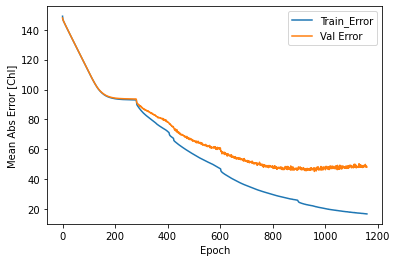

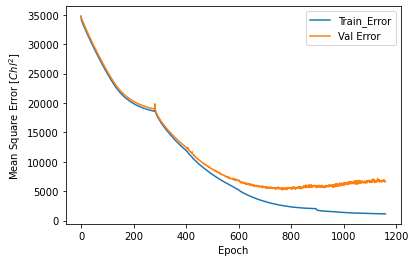

In [401]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [Chl]')
    plt.plot(hist['epoch'], hist['mae'],
            label='Train_Error')
    plt.plot(hist['epoch'], hist['val_mae'],
            label='Val Error')
    plt.legend()
   # plt.ylim([0,20])
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$Chl^2$]')
    plt.plot(hist['epoch'], hist['mse'],
            label='Train_Error')
    plt.plot(hist['epoch'], hist['val_mse'],
            label='Val Error')
    plt.legend()
    #plt.ylim([0,100])
    
plot_history(history)

In [320]:
loss, mae, mse = model.evaluate(scaled_test_rand, test_labels_rand, verbose=0)
print("Testing set Mean Abs Error: {:5.2f} Chlorophyll".format(mae))

Testing set Mean Abs Error: 36.91 Chlorophyll


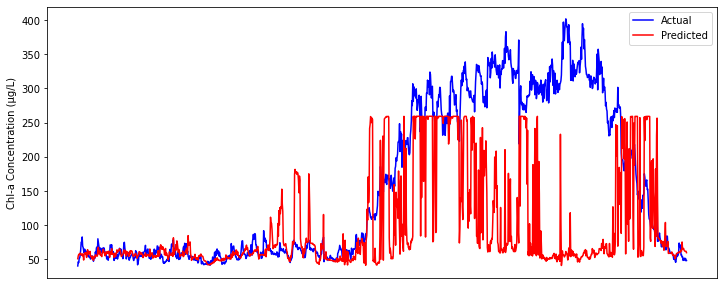

In [341]:
yhat = pd.DataFrame(model.predict(scaled_test_rand))
y_actual = pd.DataFrame(test_labels_rand)

plt.figure(figsize=(12,5))
#plt.xlabel('Actual vs Predicted Chl-a')
#plt.xticks(predicted_y, predicted_y.index.values)

plt.ylabel('Chl-a Concentration (µg/L)')

plt.plot(y_actual, color='blue', label = 'Actual')

plt.plot(yhat, color='red', label = 'Predicted')

ax = plt.gca()
ax.axes.xaxis.set_visible(False)
plt.xlabel('February to March')
plt.legend()
plt.show()

In [322]:
from math import sqrt
yhat = model.predict(scaled_test_rand)
yhat_trn = model.predict(scaled_train_rand)
# calculate RMSE
rmse = sqrt(mean_squared_error(test_labels_rand, yhat))
print('Test RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(train_labels_rand, yhat_trn))
print('Train RMSE: %.3f' % rmse)

print('Test R2 Score: ', r2_score(test_labels_rand, yhat))

print('Train R2 Score: ', r2_score(train_labels_rand, yhat_trn))

Test RMSE: 75.072
Train RMSE: 28.643
Test R2 Score:  0.5705060600748251
Train R2 Score:  0.9341418599492435


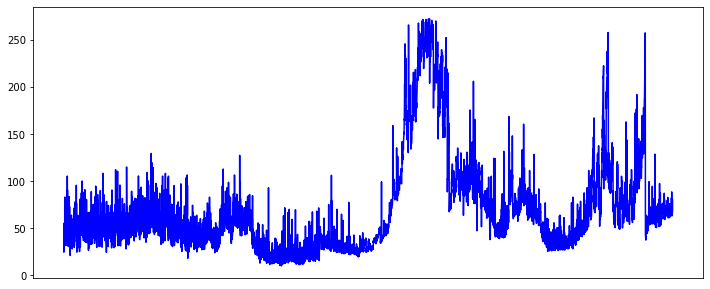

In [327]:
# yhat = pd.DataFrame(model.predict(scaled_test_rand))
# y_actual = pd.DataFrame(test_labels_rand)

plt.figure(figsize=(12,5))
#plt.xlabel('Actual vs Predicted Chl-a')
#plt.xticks(predicted_y, predicted_y.index.values)

#plt.ylabel('Chl-a Concentration (µg/L)')

plt.plot(dataset_trimmed['turb'], color='blue')

#plt.plot(yhat, color='red', label = 'Predicted')

ax = plt.gca()
ax.axes.xaxis.set_visible(False)
# plt.xlabel('February to March')
# plt.legend()
plt.show()

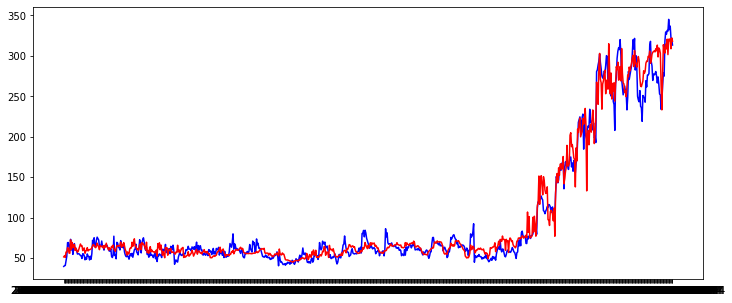

In [285]:
#Save Model for later use
#model.save('mlp_feb_mar')
# model2 = keras.models.load_model('mlp_feb_mar')

# yhat = pd.DataFrame(model2.predict(scaled_test_rand))
# y_actual = pd.DataFrame(test_labels_rand)

# plt.figure(figsize=(12,5))
# #plt.xlabel('Actual vs Predicted Chl-a')
# #plt.xticks(predicted_y, predicted_y.index.values)

# plt.plot(y_actual, color='blue')
# plt.plot(yhat, color='red')
# plt.show()